In [17]:
import pandas as pd

df = pd.read_csv('crawling_data.csv')
df.head()

,title,text,topic
0,개방형 혁신과 글로벌 SaaS 기업으로의 도약,\n\n\n산업별 특화 SaaS 시장에서의 기회\n\n\n새해부터 화두로 떠오른 챗...,['개방형 혁신과 글로벌 SaaS 기업으로의 도약']
1,"‘디지털 플랫폼 정부’의 방향, 집합적 임팩트(Collective Impact)를 ...",\n\n\n들어가며\n\n\n어느덧 코로나19가 발병한지 3년이 넘어가면서 우리는 ...,"['개방형 혁신', 'SaaS']"
2,‘모든 기업가’에게 새로운 가능성을 제공하는 디지털 기술,\n\n\n봉강호 선임연구원 소프트웨어정책연구소 디지털통계센터 bk91@spri.k...,"['‘디지털 플랫폼 정부’의 방향, 집합적 임팩트(Collective Impact)..."
3,이어령은 인공지능을 어떻게 보았나,\n\n\n\n\n지난 2월 26일 이어령 선생이 타계했다. 마지막까지 죽음의 관찰...,"['디지털 플랫폼 정부', '집합적 임팩트']"
4,"화웨이의 출사표, 훙멍 OS 2.0",\n\n\n심화되는 미중 기술 갈등과 화웨이 OS\n\n\n2019년 미국이 화웨이...,['‘모든 기업가’에게 새로운 가능성을 제공하는 디지털 기술']


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   316 non-null    object
 1   text    316 non-null    object
 2   topic   316 non-null    object
dtypes: object(3)
memory usage: 7.5+ KB


In [11]:
print('결측값 여부 :',df.isnull().values.any())

결측값 여부 : False


In [12]:
print('text열의 유니크한 값 :',df['text'].nunique())

text열의 유니크한 값 : 316


In [42]:
df['text'] = df['text'].str.replace('\s+', ' ').replace("[^ㄱ-ㅎㅏ-ㅣ가-힣a-zA-Z0-9\s@\"]+","")

C:\Users\heo\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [40]:
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [41]:
stopwords = [
    "이",    "있",    "하",    "것",    "들",    "그",    "되",
    "수",    "이",    "보",    "않",    "없",    "나",    "사람",
    "주",    "아니",    "등",    "같",    "우리",    "때",    "년",
    "가",    "한",    "지",    "대하",    "오",    "말",
    "일",    "그렇",    "위하",    "때문",    "그것",    "두",
    "말하",    "알",    "그러나",    "받",    "못하",    "일",
    "그런",    "또",    "문제",    "더",    "사회",    "많",
    "그리고",    "좋",    "크",    "따르",    "중",    "나오",    "가지",
    "씨",    "시키",    "만들",    "지금",    "생각하",    "그러",
    "속",    "하나",    "집",    "살",    "모르",    "적",    "월",
    "데",    "자신",    "안",    "어떤",    "내",    "내",    "경우",
    "명",    "생각",    "시간",    "그녀",    "다시",    "이런",    "앞",
    "보이",    "번",    "나",    "다른",    "어떻",    "여자",    "개",
    "전",    "들",    "사실",    "이렇",    "점",    "싶",    "정도",
    "좀",    "원",    "잘",    "통하",    "소리",    "놓",
    '의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다'
]


In [44]:
# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()

from tqdm import tqdm
tokenized_data = []
for sentence in tqdm(df['text']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)

100%|████████████████████████████████████████████████████████████████████████████████| 316/316 [00:27<00:00, 11.41it/s]


In [51]:
from gensim.models import Word2Vec

model = Word2Vec(sentences = tokenized_data, vector_size = 100, window = 5, min_count = 100, workers = 4)
document_vectors = model.wv.vectors

In [52]:
from sklearn.cluster import KMeans

# Perform k-means clustering
num_clusters = 10  # Number of clusters
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(document_vectors)
cluster_labels = kmeans.labels_

cluster_labels

array([3, 3, 2, 3, 4, 3, 7, 4, 7, 4, 9, 9, 9, 4, 9, 0, 2, 1, 9, 1, 9, 7,
       3, 0, 4, 7, 9, 3, 2, 5, 2, 3, 2, 3, 3, 3, 2, 5, 3, 5, 9, 2, 5, 9,
       3, 4, 3, 2, 6, 9, 4, 2, 7, 9, 2, 9, 7, 9, 9, 2, 7, 3, 9, 0, 2, 4,
       4, 2, 2, 3, 1, 0, 6, 4, 7, 4, 9, 8, 2, 3, 5, 3, 5, 2, 4, 7, 8, 7,
       0, 9, 9, 7, 0, 9, 2, 7, 4, 7, 2, 3, 8, 9, 7, 7, 6, 5, 9, 7, 1, 4,
       2, 3, 2, 2, 9, 9, 4, 9, 0, 0, 7, 2, 2, 9, 2, 0, 3, 9, 1, 0, 3, 0,
       3, 3, 4, 9, 6, 7, 2, 4, 5, 3, 3, 8, 2, 4, 4, 3, 4, 9, 3, 9, 4, 2,
       3, 0, 4, 4, 1, 5, 3, 0, 3, 3, 3, 9, 0, 2, 3, 0, 9, 9, 0, 9, 4, 4,
       9, 5, 2, 4, 9, 3, 3, 4, 3, 4, 4, 2, 3, 4, 3, 2, 3, 4, 9, 2, 4, 3,
       0, 9, 4, 3, 0, 4, 9, 4, 4, 2, 4, 9, 4, 0, 3, 9, 0, 3, 9, 3, 7, 9,
       0, 4, 3, 8, 2, 9, 9, 4, 7, 3, 8, 0, 0, 4, 4, 4, 3, 0, 2, 8, 4, 8,
       9, 2, 9, 8, 4, 4, 3, 2, 7, 3, 0, 3, 2, 9, 4, 4, 3, 1, 9, 3, 4, 3,
       4, 1, 4, 0, 9, 7, 0, 0, 4, 0, 5, 0, 4, 3, 9, 2, 3, 2, 4, 0, 0, 9,
       0, 4, 2, 4, 3, 0, 2, 4, 7, 4, 9, 4, 1, 3, 9,

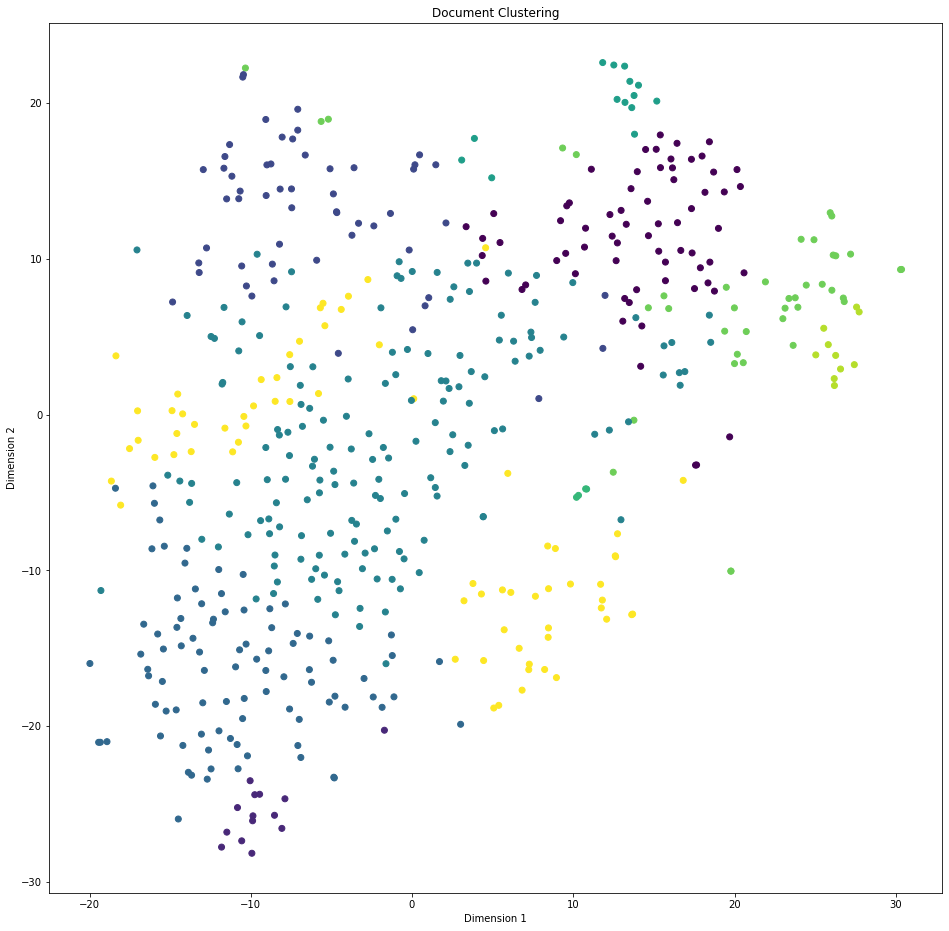

In [53]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Apply t-SNE to reduce dimensionality of document vectors
tsne = TSNE(n_components=2, random_state=42)
document_vectors_2d = tsne.fit_transform(document_vectors)

# Plot the clusters
plt.figure(figsize=(16, 16)) 
plt.scatter(document_vectors_2d[:, 0], document_vectors_2d[:, 1], c=cluster_labels)
plt.title("Document Clustering")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

In [54]:
def tsne_plot(model):
    import warnings

    # 경고메세지 끄기
    warnings.filterwarnings(action='ignore')
    
    labels = []
    tokens = []

    for label in model.wv.key_to_index:
        labels.append(label)
        tokens.append(model.wv[label])
        
    tsne = TSNE(n_components=2, random_state=42)
    document_vectors_2d = tsne.fit_transform(document_vectors)

    x = []
    y = []
    for value in document_vectors_2d:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.rcParams['font.family'] = 'Gulim'
        plt.scatter(document_vectors_2d[:, 0], document_vectors_2d[:, 1], c=cluster_labels)
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

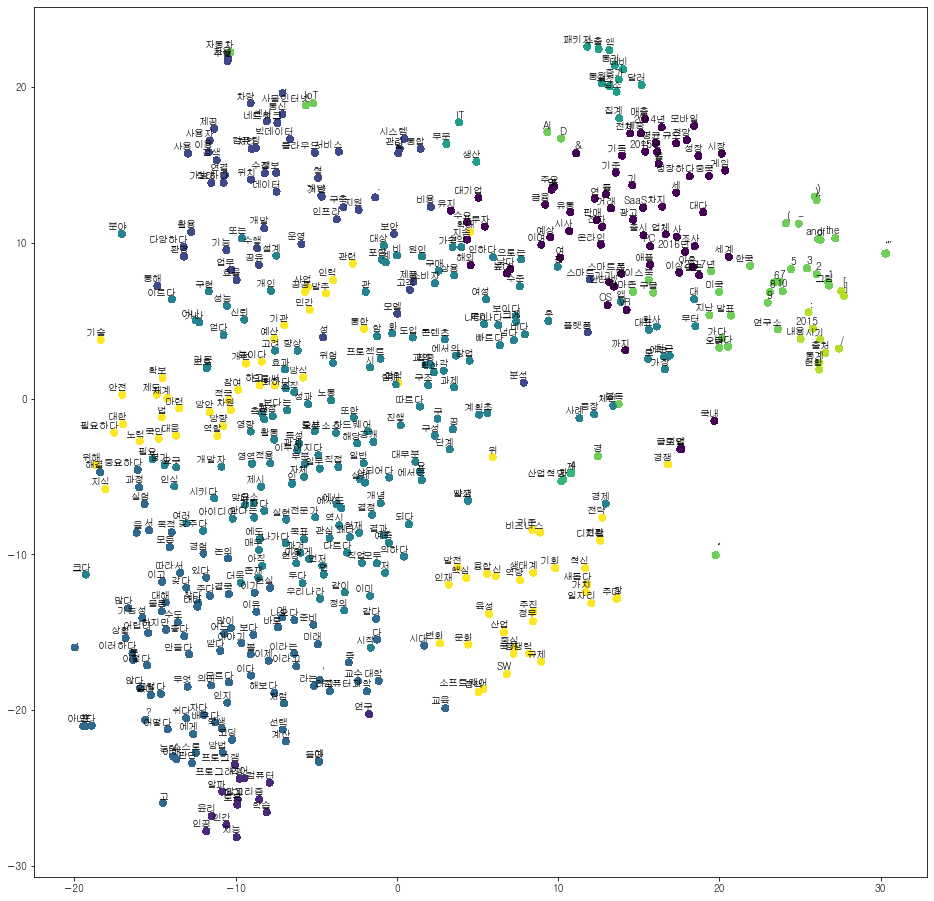

In [55]:
tsne_plot(model)